# Importing the dependencies

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #create data frames(CSV should be converted to structered form)


# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.tests import TfidfVectorizer # convert text data into numerical data
# from sklearn.linear_model import logisticRegression
# from sklearn.metrics import accuracy_score #test data is used to test the model- to find the accuarcy needs

# Importing the dataset

In [25]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
# url_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"

data = pd.read_csv("spambase.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [26]:
data.shape

(4601, 58)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [28]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


# divide into X and y data sets

datafram.iloc[row,column]
:- all the elements
3- 2nd row
1: 3 - does not include the last stated column

In [29]:
X = data.iloc[:,0:-1].values

In [30]:
y = data.iloc[:,-1].values

# Splitting the data set  into training and test sets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42, shuffle=True)

In [33]:
# Feature scaling - a method used to normalize the range of independent variables or features of data.
# It normalizes data within a certain range
from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
X_train = ssc.fit_transform(X_train)
X_test = ssc.fit_transform(X_test)

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knclassifier = KNeighborsClassifier(n_neighbors=5,metric="minkowski", p=2)
# p - power parameter
# metric-metrics used for distance computation
# minkowski- euclidean distance
knclassifier.fit(X_train,y_train) #fitting classifier to the training set

KNeighborsClassifier()

In [52]:
y_knn_predic = knclassifier.predict(X_test) # predicting the test set results

C:\Users\lisar\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [47]:
# def length(X, y):
#     empty_list = []
#     for n in range(1,100):
#         X_train, X_test, y_train, y_test = train_test_split(X, y)
#         knclassifier = KNeighborsClassifier(n_neighbors=(n))
#         knclassifier.fit(X_train, y_train)
#         y_knn_class = knclassifier.predict(X_test)
#         empty_list.append(metrics.accuracy_score(y_test, y_knn_class))
#
#     return empty_list
#     print(empty_list)


In [0]:
print (y_knn_predic[0:5])
print (y_test[0:5])
# to visually compare the prediction to the actual values

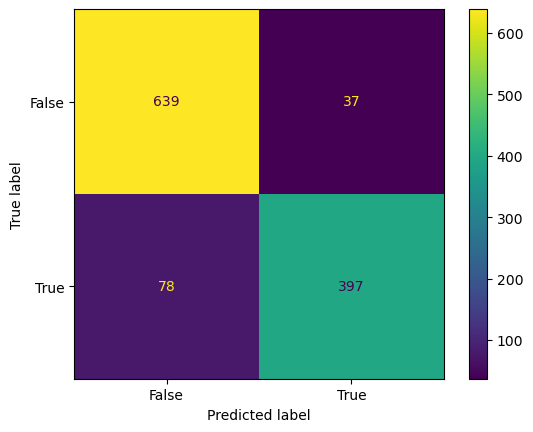

In [59]:
# Getting the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_knn_predic)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = [False,True])
cm_display.plot()
plt.show()

accuracy = True +ve/(True +ve + False +ve)
sensitivity = True +ve/(True +ve + False -ve)
specificity = True -ve/(True +ve + False -ve)
F-score = 2*(Precision*sensitivity)/(Precision+sensitivity)

In [66]:
from sklearn.metrics import precision_score
from sklearn import metrics

accuracy_knn =metrics.accuracy_score(y_test,y_knn_predic)
prec_knn = precision_score(y_test, y_knn_predic)
Sensitivity_recall_knn = metrics.recall_score(y_test, y_knn_predic) # Sensitivity- how well the model predicts something is positive
Specificity_knn = metrics.recall_score(y_test, y_knn_predic) # Specificity- how well the model predicts something is negative
F_score_knn = metrics.f1_score(y_test,y_knn_predic)

print("accuracy of KNN  model: ",accuracy_knn)
print("Precision of KNN  model: ",prec_knn)
print("Sensitivity of KNN  model: ",Sensitivity_recall_knn)
print("Specificity of KNN model: ",Specificity_knn)
print("F1 score of KNN  model: ",F_score_knn)

accuracy of KNN  model:  0.9000868809730669
Precision of KNN  model:  0.9147465437788018
Sensitivity of KNN  model:  0.8357894736842105
Specificity of KNN model:  0.8357894736842105
F1 score of KNN  model:  0.8734873487348735


C:\Users\lisar\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lisar\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


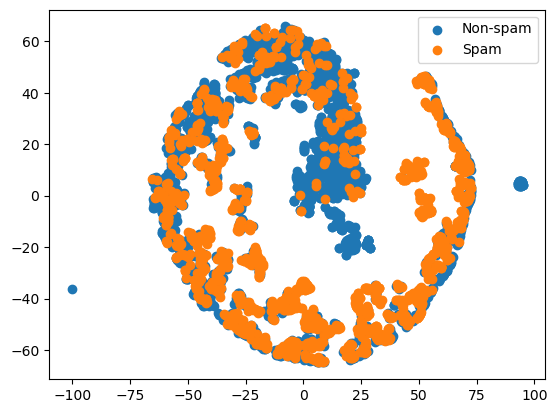

In [79]:
# Reduce dimensionality using t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize data
plt.scatter(X_tsne[y==0, 0], X_tsne[y==0, 1], label='Non-spam')
plt.scatter(X_tsne[y==1, 0], X_tsne[y==1, 1], label='Spam')
plt.legend()
plt.show()

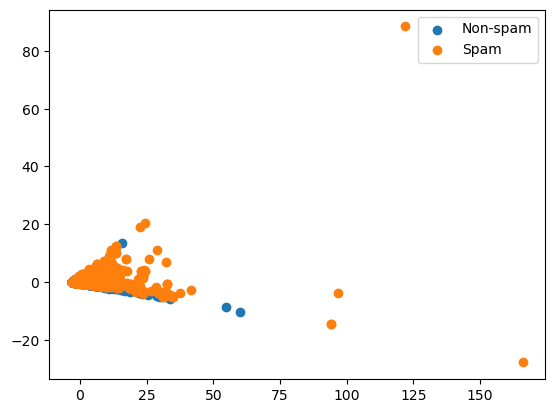

In [82]:
# Visualize using PCA
# Normalize data
from sklearn.decomposition import PCA
X_norm = (X - X.mean()) / X.std()

# Reduce dimensionality using PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_norm)

# Visualize data
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], label='Non-spam')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], label='Spam')
plt.legend()
plt.show()

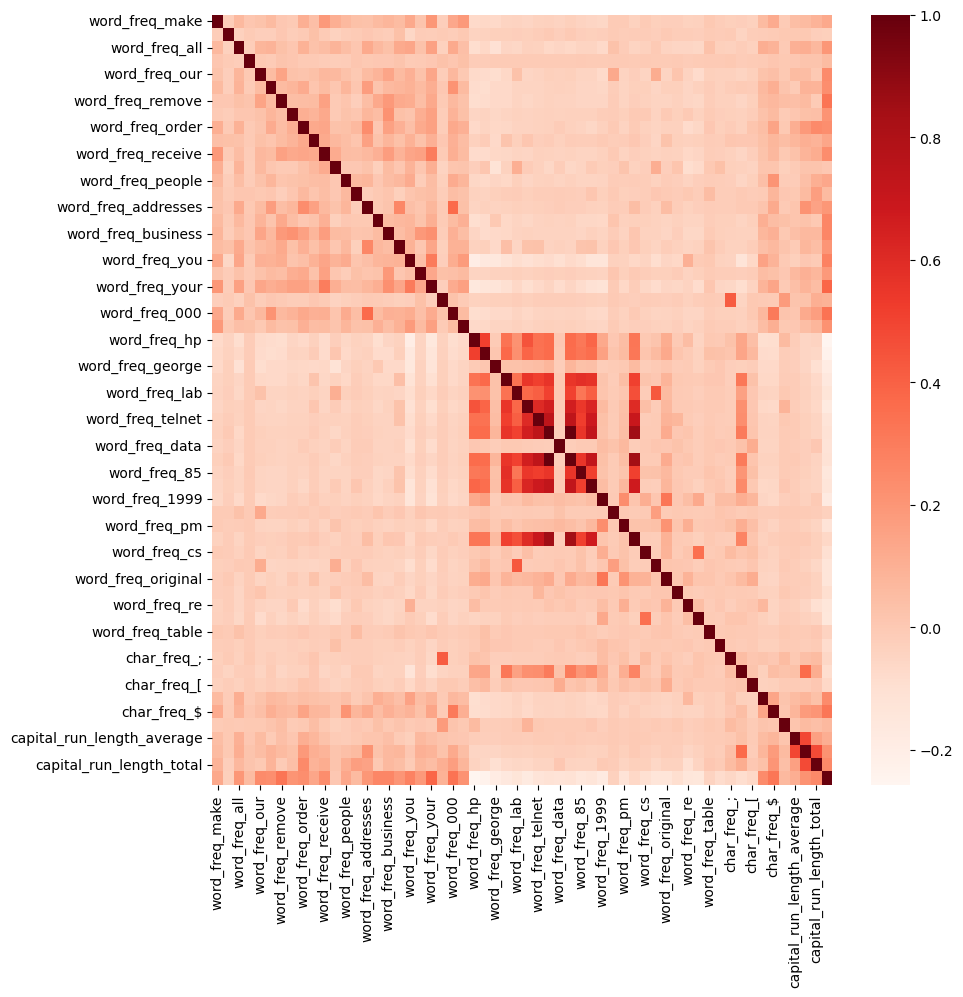

In [84]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [76]:
#Correlation with output variable
cor_target = abs(cor["spam"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

word_freq_make                0.126208
word_freq_all                 0.196988
word_freq_our                 0.241920
word_freq_over                0.232604
word_freq_remove              0.332117
word_freq_internet            0.206808
word_freq_order               0.231551
word_freq_mail                0.138962
word_freq_receive             0.234529
word_freq_people              0.132927
word_freq_addresses           0.195902
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_email               0.204208
word_freq_you                 0.273651
word_freq_credit              0.189761
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_money               0.216111
word_freq_hp                  0.256723
word_freq_hpl                 0.232968
word_freq_george              0.183404
word_freq_650                 0.158800
word_freq_lab                 0.133523
word_freq_labs                0.171095
word_freq_telnet         

# Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier

dtclassifier = DecisionTreeClassifier(random_state=42) #create a decision tree classifier instance
dtclassifier.fit(X_train,y_train) #fitting the classifier to the training data set
y_dtc_predic = dtclassifier.predict(X_test)

In [99]:
print (y_dtc_predic[0:5])
print (y_test[0:5])

[1 0 0 1 0]
[0 0 0 1 0]


## Evaluation

Let's check the accuracy of the models

In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("KNN Accuracy: ", metrics.accuracy_score(y_test,y_knn_predic))
print("Decision Tree Accuracy: ", metrics.accuracy_score(y_test,y_dtc_predic))

KNN Accuracy:  0.8853171155516942
Decision Tree Accuracy:  0.9131190269331017


## Visualization

In [97]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
# Importing the dependencies

Data Collection and Preprocessing

In [ ]:
# Feature scaling - a method used to normalize the range of independent variables or features of data.
# It normalizes data within a certain range
from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
x_train = ssc.fit_transform(x_train)
x_test = ssc.fit_transform(x_test)

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knclassifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2) # p- power parameter # metric-metrics used for distance computation
# minkowski- euclidean distance

knclassifier.fit(x_train,y_train) #fitting classifier to the training set
y_knn_predic = knclassifier.predict(x_test) # predicting the test set results

In [ ]:
print (y_knn_predic[0:5])
print (y_test[0:5])
# to visually compare the prediction to the actual values

In [ ]:
# Decision Tree

In [ ]:
print (y_dtc_predic[0:5])
print (y_test[0:5])

## Evaluation

Let's check the accuracy of the models

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("KNN Accuracy: ", metrics.accuracy_score(y_test,y_knn_predic))
print("Decision Tree Accuracy: ", metrics.accuracy_score(y_test,y_dtc_predic))

## Visualization

In [89]:
# !pip install pydotplus
# import pydotplus
# import os
# os.environ["PATH"] += os.pathsep + r"E:\Downloads\Graphviz\bin"

In [94]:
from six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

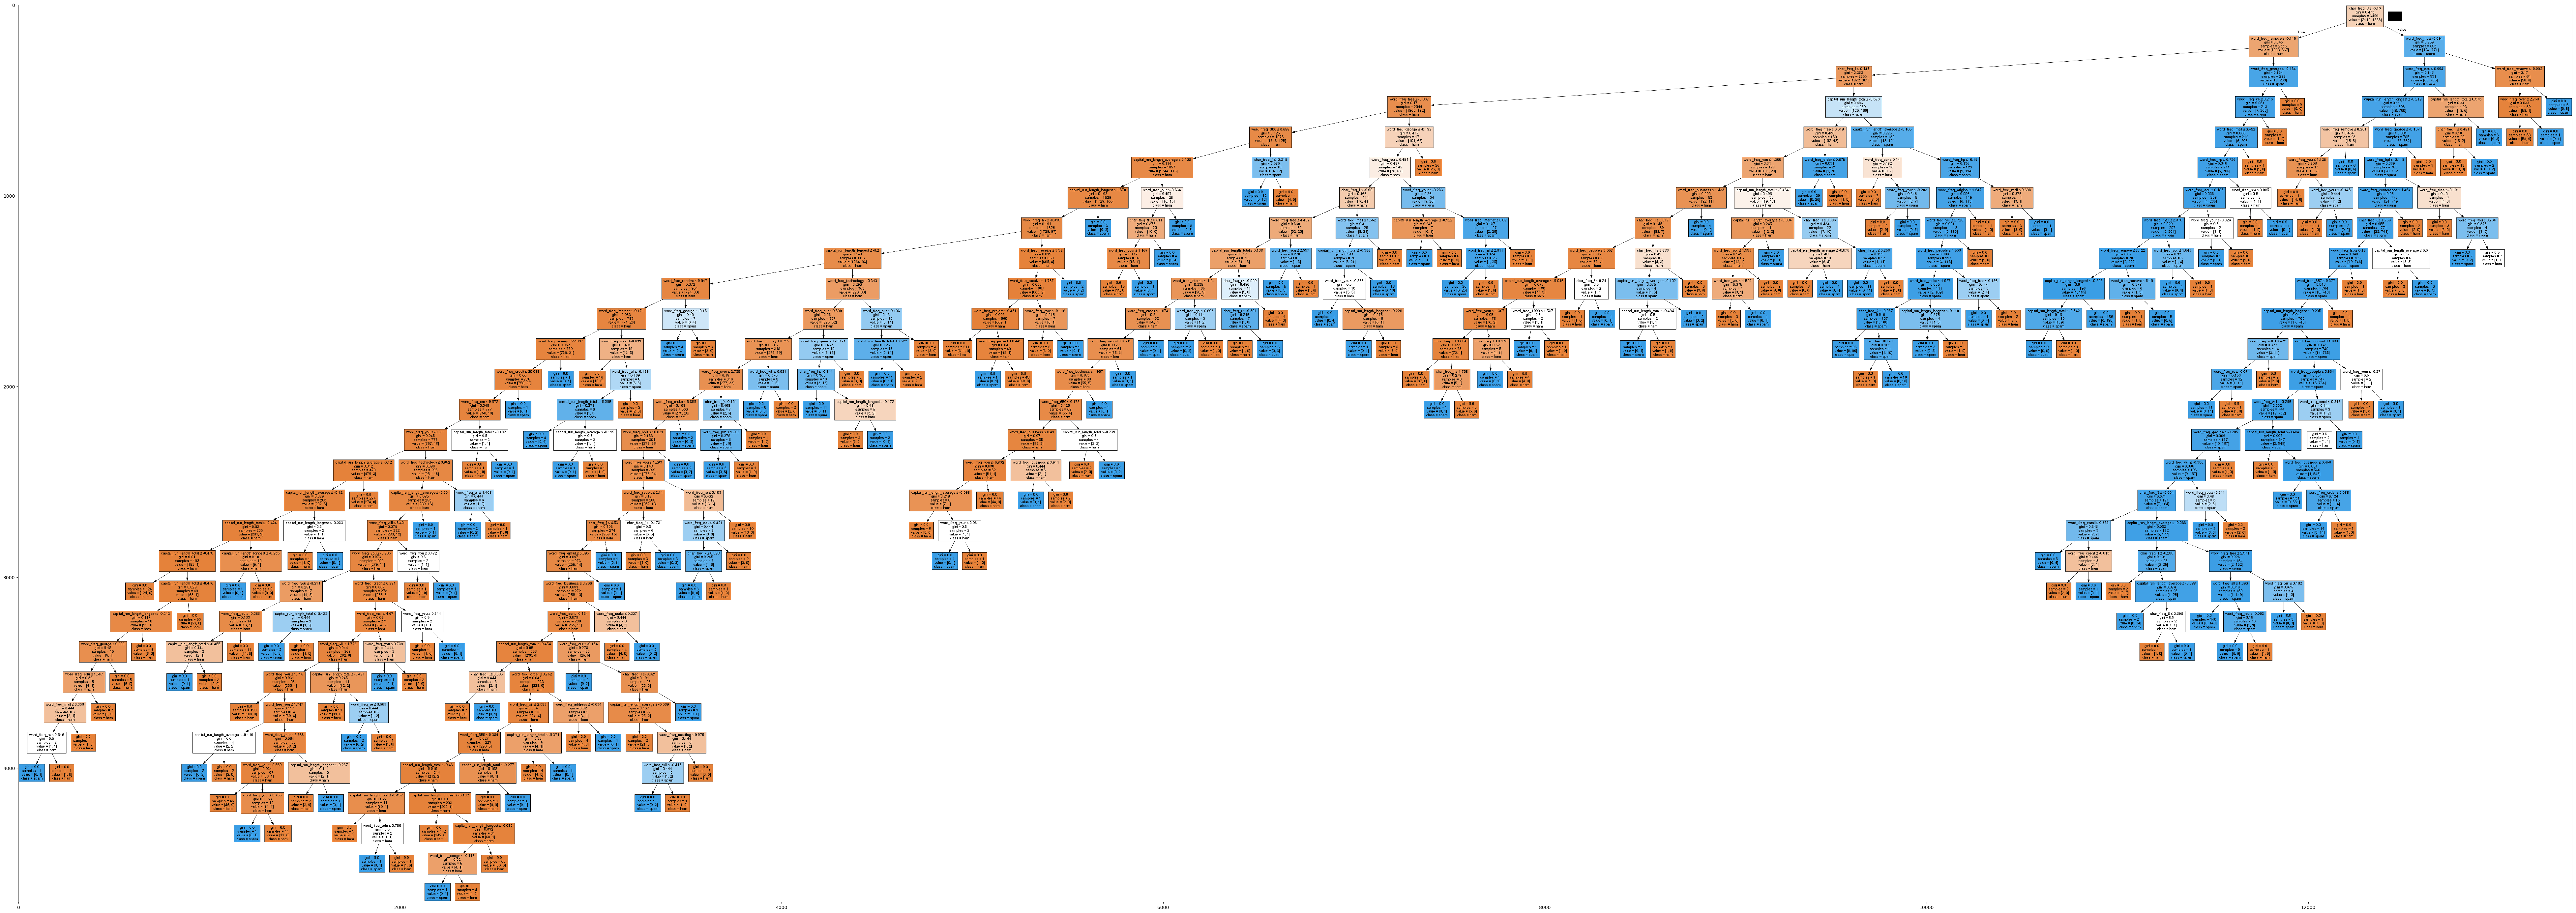

In [95]:
dot_data = StringIO()
filename = "spamtree.png"

featureNames = data.columns[0:57]
# targetNames = data["Drug"].unique().tolist()

out=tree.export_graphviz(dtclassifier,feature_names=featureNames,
                         out_file=dot_data,
                         class_names= ["ham", "spam"],
                         filled=True,
                         special_characters=True,
                         rotate=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)

plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [ ]:
from matplotlib import pyplot as plt # Visualize the training data set results
from matplotlib.colors import ListedColormap # used to create a custom color map for the plot

x_set, y_set= x_train, y_train #assign values which are used to create a grid of points for the plot
x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1, step = 0.01),np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1, step = 0.01))
plt.contourf(x1, x2, knclassifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75, cmap = ListedColormap(('pink','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x1.min(),x1.max())

In [ ]:
from matplotlib import pyplot as plt
# Visualize the training data set results

from matplotlib.colors import ListedColormap
# used to create a custom color map for the plot

x_set, y_set= x_train, y_train #assign values which are used to create a grid of points for the plot

x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1, step = 0.01),np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1, step = 0.01))
plt.contourf(x1, x2, knclassifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75, cmap = ListedColormap(('pink','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x1.min(),x1.max())
